# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

# Problem Statement
To understand how demographic, offer type and channels affect offer completion to be able to make decisions based on customer preferences.

Resulting visualizations would be used to make conclusions.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

from ast import literal_eval
import datetime
0
# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

## Data Cleaning and Exploration

### Portfolio

In [2]:
# view the dataset
portfolio

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2


In [3]:
# check for missing values
portfolio.isnull().sum()

channels      0
difficulty    0
duration      0
id            0
offer_type    0
reward        0
dtype: int64

In [4]:
# check data types
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
channels      10 non-null object
difficulty    10 non-null int64
duration      10 non-null int64
id            10 non-null object
offer_type    10 non-null object
reward        10 non-null int64
dtypes: int64(3), object(3)
memory usage: 560.0+ bytes


In [5]:
# explore the values in the channels column
portfolio['channels'].value_counts

<bound method IndexOpsMixin.value_counts of 0         [email, mobile, social]
1    [web, email, mobile, social]
2            [web, email, mobile]
3            [web, email, mobile]
4                    [web, email]
5    [web, email, mobile, social]
6    [web, email, mobile, social]
7         [email, mobile, social]
8    [web, email, mobile, social]
9            [web, email, mobile]
Name: channels, dtype: object>

**To clean:**
* channels column would be split into different columns for web, email, mobile, and social respectively.
* `id` column would be renamed to `offer_id`

In [6]:
# create a copy of dataset for cleaning
portfolio_clean = portfolio.copy()

In [7]:
# split the channel column
for i in ['web', 'email', 'mobile', 'social']:
    portfolio_clean[i] = portfolio_clean['channels'].apply(lambda x: 1 if i in x else 0)
portfolio_clean.drop('channels', axis=1, inplace=True)
portfolio_clean.head()

,difficulty,duration,id,offer_type,reward,web,email,mobile,social
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,0,1,1,1
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,1,1,1
2,0,4,3f207df678b143eea3cee63160fa8bed,informational,0,1,1,1,0
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,1,1,0
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,1,1,0,0


In [8]:
# rename column
portfolio_clean.rename(columns = {'id':'offer_id'}, inplace = True)

In [9]:
# check for duplicate values
portfolio_clean.duplicated().sum()

0

In [10]:
# view the cleaned dataset
portfolio_clean

,difficulty,duration,offer_id,offer_type,reward,web,email,mobile,social
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,0,1,1,1
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,1,1,1
2,0,4,3f207df678b143eea3cee63160fa8bed,informational,0,1,1,1,0
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,1,1,0
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,1,1,0,0
5,7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3,1,1,1,1
6,10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2,1,1,1,1
7,0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0,0,1,1,1
8,5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5,1,1,1,1
9,10,7,2906b810c7d4411798c6938adc9daaa5,discount,2,1,1,1,0


### Profile

In [11]:
# view the dataset
profile.head()

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [12]:
# check the missing values
profile.isnull().sum()

age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64

In [13]:
# explore the data type
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
age                 17000 non-null int64
became_member_on    17000 non-null int64
gender              14825 non-null object
id                  17000 non-null object
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.1+ KB


In [14]:
profile.shape

(17000, 5)

In [15]:
# check for duplicate values
profile.duplicated().sum()

0

#### To clean:

* `became_member_on` should be a date column and would be converted.
* the year and month would also be extracted to find patterns
* drop rows with missing values
* create columns that groups the age and income into bins
* rename `id` column to `customer_id`

In [16]:
# create a copy of the dataset for cleaning
profile_clean = profile.copy()

In [17]:
# convert to date column
profile_clean['became_member_on'] = profile_clean.became_member_on.apply(lambda x: datetime.datetime.strptime(str(x), '%Y%m%d'))

In [18]:
# extract year of membership
profile_clean['membership_year'] = pd.DatetimeIndex(profile_clean['became_member_on']).year

In [19]:
# extract month of membership
profile_clean['membership_month'] = pd.DatetimeIndex(profile_clean['became_member_on']).month

In [20]:
# check that changes have been effected
profile_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 7 columns):
age                 17000 non-null int64
became_member_on    17000 non-null datetime64[ns]
gender              14825 non-null object
id                  17000 non-null object
income              14825 non-null float64
membership_year     17000 non-null int64
membership_month    17000 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 929.8+ KB


In [21]:
# drop the missing values
profile_clean.dropna(inplace = True)

In [22]:
# check missing values
profile_clean.isnull().sum()

age                 0
became_member_on    0
gender              0
id                  0
income              0
membership_year     0
membership_month    0
dtype: int64

In [23]:
# check minimum age to get idea of appropriate age bins
profile_clean.age.min()

18

In [24]:
# check maximum age to get idea of appropriate age bins
profile_clean.age.max()

101

In [25]:
# create new columns `age_range` and `income_range` to group age and income respectively
labels = ['10-19','20-29', '30-39', '40-49', '50-59','60-69', '70-79', '80-89', '90-99', '100-109']
profile_clean['age_range'] = pd.cut(profile_clean['age'], bins=range(10,120,10), right=False, labels=labels)
    
profile_clean['income_range'] = pd.cut(profile_clean['income'], bins=range(30000,140000,10000), right=False,
                                    labels=['30-39K','40-49K', '50-59K', '60-69K', '70-79K','80-89K', '90-99K',
                                            '100-109K', '110-119K', '>=120K'])
    

In [26]:
# rename column
profile_clean.rename(columns = {'id':'customer_id'}, inplace = True)

In [27]:
# view the final cleaned dataset
profile_clean.head()

,age,became_member_on,gender,customer_id,income,membership_year,membership_month,age_range,income_range
1,55,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0,2017,7,50-59,110-119K
3,75,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017,5,70-79,100-109K
5,68,2018-04-26,M,e2127556f4f64592b11af22de27a7932,70000.0,2018,4,60-69,70-79K
8,65,2018-02-09,M,389bc3fa690240e798340f5a15918d5c,53000.0,2018,2,60-69,50-59K
12,58,2017-11-11,M,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,2017,11,50-59,50-59K


### Transcript

In [28]:
# view the dataset
transcript.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [29]:
# check for missing values
transcript.isnull().sum()

event     0
person    0
time      0
value     0
dtype: int64

In [30]:
# view data types
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
event     306534 non-null object
person    306534 non-null object
time      306534 non-null int64
value     306534 non-null object
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [31]:
# explore unique values in the `event` column
transcript['event'].value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [32]:
# create a copy of the dataset for cleaning
transcript_clean = transcript.copy()

#### To clean:
* the value column is a dictionary that should be cleaned into columns with their values
* rename id column to offer id and person column to customer id
* check and drop duplicates

In [33]:
transcript_clean['value'] = transcript_clean['value'].astype(str).replace({'offer id': 'offer_id'}, regex=True)
transcript_clean['value'] = transcript_clean['value'].apply(literal_eval)
transcript_clean = transcript_clean.join(pd.DataFrame(transcript_clean.pop('value').values.tolist()))

In [34]:
# view changes
transcript_clean.head()

,event,person,time,amount,offer_id,reward
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,offer received,e2127556f4f64592b11af22de27a7932,0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN


In [35]:
# rename column
transcript_clean.rename(columns = {'person':'customer_id'}, inplace = True)

In [36]:
# viewe cleaned column
transcript_clean.head()

,event,customer_id,time,amount,offer_id,reward
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,offer received,e2127556f4f64592b11af22de27a7932,0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN


In [37]:
# check for duplicate values
transcript_clean.duplicated().sum()

397

In [38]:
# drop duplicate rows
transcript_clean = transcript_clean.drop_duplicates()

In [40]:
# check resulting shape
transcript_clean.shape

(306137, 6)

### Merge the three datasets

In [41]:
# Merge transcript and portfolio data on offer_id
starbucks_df = transcript_clean.merge(portfolio_clean, left_on='offer_id', 
                                     right_on='offer_id', how='inner')

In [42]:
starbucks_df.shape

(167184, 14)

In [43]:
# Merge the result from above with profile data on customer_
starbucks_df = starbucks_df.merge(profile_clean, left_on='customer_id', 
                                right_on='customer_id', how='inner')

In [44]:
# view the final merged dataset
starbucks_df.head()

,event,customer_id,time,amount,offer_id,reward_x,difficulty,duration,offer_type,reward_y,...,mobile,social,age,became_member_on,gender,income,membership_year,membership_month,age_range,income_range
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5,7,bogo,5,...,1,0,75,2017-05-09,F,100000.0,2017,5,70-79,100-109K
1,offer viewed,78afa995795e4d85b5d9ceeca43f5fef,6,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5,7,bogo,5,...,1,0,75,2017-05-09,F,100000.0,2017,5,70-79,100-109K
2,offer completed,78afa995795e4d85b5d9ceeca43f5fef,132,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,5,7,bogo,5,...,1,0,75,2017-05-09,F,100000.0,2017,5,70-79,100-109K
3,offer received,78afa995795e4d85b5d9ceeca43f5fef,504,NaN,f19421c1d4aa40978ebb69ca19b0e20d,NaN,5,5,bogo,5,...,1,1,75,2017-05-09,F,100000.0,2017,5,70-79,100-109K
4,offer completed,78afa995795e4d85b5d9ceeca43f5fef,510,NaN,f19421c1d4aa40978ebb69ca19b0e20d,5.0,5,5,bogo,5,...,1,1,75,2017-05-09,F,100000.0,2017,5,70-79,100-109K


In [45]:
# view the final merged dataset
starbucks_df.shape

(148431, 22)

# Exploratory Data Analysis

### Understanding Customer Demographics

In [46]:
profile_clean.head()

,age,became_member_on,gender,customer_id,income,membership_year,membership_month,age_range,income_range
1,55,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0,2017,7,50-59,110-119K
3,75,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017,5,70-79,100-109K
5,68,2018-04-26,M,e2127556f4f64592b11af22de27a7932,70000.0,2018,4,60-69,70-79K
8,65,2018-02-09,M,389bc3fa690240e798340f5a15918d5c,53000.0,2018,2,60-69,50-59K
12,58,2017-11-11,M,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,2017,11,50-59,50-59K


#### Gender Distribution

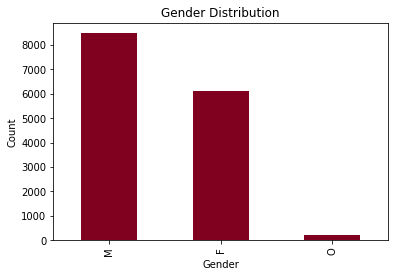

In [47]:
# plot bar chart showing gender distribution of customers
profile_clean['gender'].value_counts().plot(kind = 'bar', color = '#800020')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

* About half of the customers are males
* less than one thousand identify as other

#### Age distribution

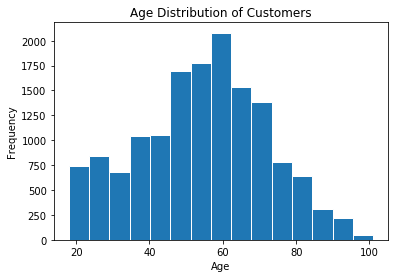

In [48]:
# plot histogram showing age distribution of customers
profile_clean['age'].plot(kind ='hist', bins=15, edgecolor='white')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.show()

* the histogram above shows that majority of the customers are between the aged of 50 to 70

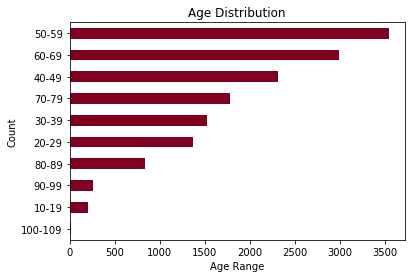

In [49]:
# plot bar chart showing gender distribution of customers
age_val = profile_clean['age_range'].value_counts()
age_val = age_val.sort_values()
age_val.plot(kind = 'barh', color = '#800020')
plt.title('Age Distribution')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.show()

* The bar chart above concurs with the previous histogram, majority of teh customets are between the ages of 50 and 70
* the mush older and much younger population (10-29 and 80-99) are the least

In [50]:
profile_clean.describe()

,age,income,membership_year,membership_month
count,14825.000000,14825.000000,14825.000000,14825.000000
mean,54.393524,65404.991568,2016.620169,6.695582
std,17.383705,21598.299410,1.198245,3.488853
min,18.000000,30000.000000,2013.000000,1.000000
25%,42.000000,49000.000000,2016.000000,4.000000
50%,55.000000,64000.000000,2017.000000,7.000000
75%,66.000000,80000.000000,2017.000000,10.000000
max,101.000000,120000.000000,2018.000000,12.000000


* the descriptive statistics above shows that median and average age are 55 and 54.
* All customers are adults as the minimum age is 18.
* minimum income of customers is 30000

#### Income Distribution

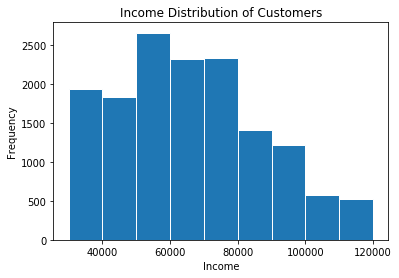

In [51]:
# plot histogram showing income distribution of customers
profile_clean['income'].plot(kind ='hist', bins=9, edgecolor='white')
plt.title('Income Distribution of Customers')
plt.xlabel('Income')
plt.show()

* the above histogram shows that the majority of customers earn between 50000 to 60000

#### Year with most new membership

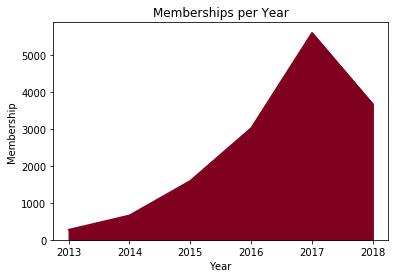

In [52]:
# plot area chart showing membership acquisition across the years
profile_clean['membership_year'].value_counts().sort_index().plot(kind = 'area', color = '#800020')
plt.title('Memberships per Year')
plt.xlabel('Year')
plt.ylabel('Membership')
plt.show()

* the above chart shows that number of membership enrolments rose by about double yearly and peaked in 2017

#### Monthly customer membership

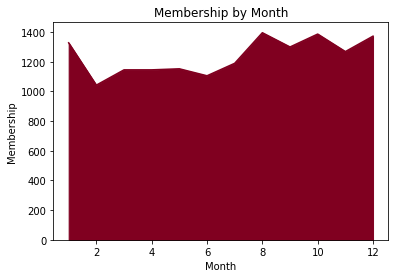

In [53]:
# plot area chart showing membership acquisition pattern by month
profile_clean['membership_month'].value_counts().sort_index().plot(kind = 'area', color = '#800020')
plt.title('Membership by Month')
plt.xlabel('Month')
plt.ylabel('Membership')
plt.show()

* The chart above shows that the most number of membership enrolment usually occurs at the ends and start of the year

#### Income Distribution across Gender

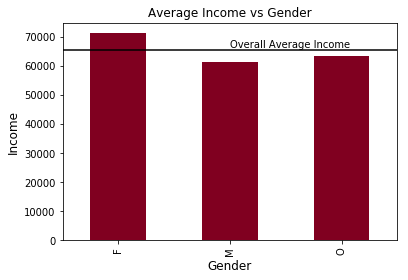

In [54]:
gender_income = profile_clean.groupby('gender', as_index=False).agg({'income':'mean'})
gender_income.plot(kind = 'bar', x = 'gender', y = 'income', color = '#800020', legend=False)
plt.hlines((profile_clean['income'].mean()), -100, 1000)
plt.ylabel('Income', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
plt.title('Average Income vs Gender')
plt.text(1, (profile_clean['income'].mean()) + 1000, 'Overall Average Income')
plt.show()

* The chart above shows that on average, females earn significantly higher than males and other gender of the customers
* females earn significantly higher than the general average.

### Understanding patterns in customer activities

#### Channels Distribution

In [55]:
# sum the values of the four channels columns
channel = pd.DataFrame({'channels' :['web', 'email', 'social', 'mobile' ],
'total' : [starbucks_df['web'].sum(), starbucks_df['email'].sum(), 
         starbucks_df['social'].sum(), starbucks_df['mobile'].sum()]
})

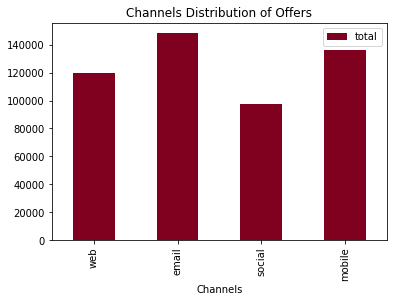

In [56]:
# plot bar chart showing channels distribution of offers
channel.plot(x='channels', kind="bar", color='#800020')
plt.title('Channels Distribution of Offers')
plt.xlabel('Channels')
plt.show()

* most of the offers were sent via email, and the least number were sent via social

#### Distribution of events of the offers

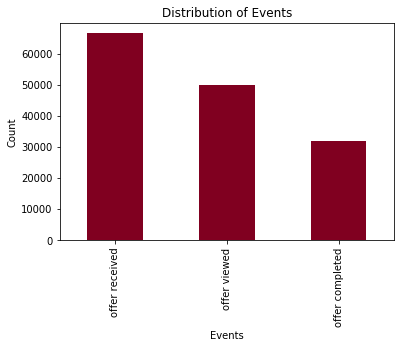

In [57]:
# plot bar chart showing distribution of events of offers sent
starbucks_df['event'].value_counts().plot(kind = 'bar', color = '#800020')
plt.title('Distribution of Events')
plt.xlabel('Events')
plt.ylabel('Count')
plt.show()

* Majority of events, about half, were transactions. 
* offers received were more than the offers viewed, and even less were completed.

#### Age distributions across the different events

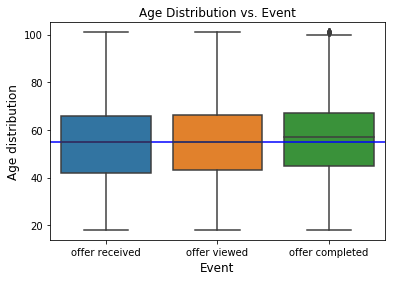

In [58]:
# plot boxplot showing the age distribution across the different events
sns.boxplot(x = 'event', y = 'age', data = starbucks_df)
plt.hlines(starbucks_df['age'].mean(), -100 , 1000, color = 'b')
plt.ylabel('Age distribution', fontsize = 12)
plt.xlabel('Event', fontsize = 12)
plt.title('Age Distribution vs. Event')
plt.show()

* the above box plot shows that thoss who completed offers were mostly of a slightly higher age group compared to thet other events, with the median age above the general average age

#### Income distributions across the different events

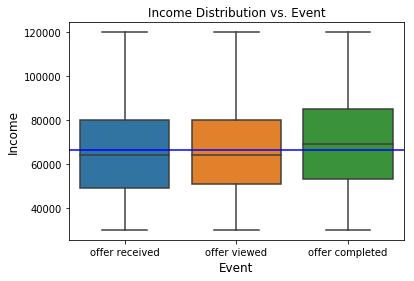

In [59]:
# plot boxplot showing the income distribution across the different events
sns.boxplot(x = 'event', y = 'income', data = starbucks_df)
plt.hlines(starbucks_df['income'].mean(), -100 , 1000, color = 'b')
plt.ylabel('Income', fontsize = 12)
plt.xlabel('Event', fontsize = 12)
plt.title('Income Distribution vs. Event')
plt.show()

* the box plot above shows that people who completed offers are mostly of higher range compared to those who oly received or viewed offers

#### Distribution of Offer Type by Event

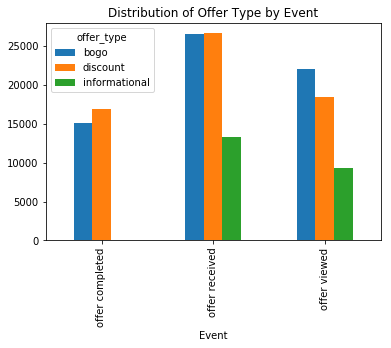

In [60]:
# plot clustered bar chart
starbucks_df.groupby(['event', 'offer_type']).size().unstack().plot(kind='bar', stacked=False)
plt.title('Distribution of Offer Type by Event')
plt.xlabel('Event')
plt.show()

* from the above chart, it can be seen that customers mostly received bogo and discount however, they mostly viewed bogo. Even though they viewed more bobo, offers thay mostly completed were discounts.

#### Distribution of channels associated with offer events

In [61]:
# create dataframes for completed, received, viewed offers, and transactions
completed_offers = starbucks_df[starbucks_df['event'] =='offer completed']
received_offers = starbucks_df[starbucks_df['event'] =='offer received']
viewed_offers = starbucks_df[starbucks_df['event'] =='offer viewed']
transacts = starbucks_df[starbucks_df['event'] =='transaction']

In [62]:
# create dataframe that aggregates count of various events across different channels
event_count = pd.DataFrame({'event' :['offer_completed', 'offer_viewed', 'offer_received'],
'web' : [completed_offers['web'].sum(), viewed_offers['web'].sum(), 
         received_offers['web'].sum()],
'email' : [completed_offers['email'].sum(), viewed_offers['email'].sum(), 
         received_offers['email'].sum()],
'mobile' : [completed_offers['mobile'].sum(), viewed_offers['mobile'].sum(), 
         received_offers['mobile'].sum()],
'social' : [completed_offers['social'].sum(), viewed_offers['social'].sum(), 
         received_offers['social'].sum()]
})

In [63]:
# view created dataframe
event_count

,event,web,email,mobile,social
0,offer_completed,28466,32070,28764,20763
1,offer_viewed,38086,49860,47645,37199
2,offer_received,53175,66501,59775,39802


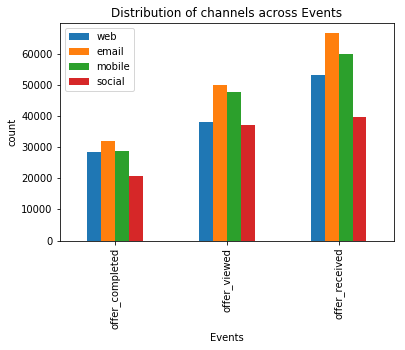

In [64]:
# plot clustered bar plot
event_count.plot.bar(x='event')
plt.title('Distribution of channels across Events')
plt.xlabel('Events')
plt.ylabel('count')
plt.show()

* The above chart shows that the distribution of highest and least channels are about the same across the different events
* It can be observed that web and mobile offers are completed at about the same rate

# Conclusion

* About half of the customers that view offers, complete it.
* Older and richer customers tend to be the ones who complete offers the most.
* Number of activities decline from offer received to offer viewed to offer completed.
* Offers are mostly sent via emails.
* Discounts are the most completed type of offers even though they are not the most sent out.